In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import poisson

# Question No. 2


Randomly collect N(say, 100) samples from a Bernoulli’s distribution (p = 0.2, 0=Failure, 1=Success) and plot the histogram of the collected samples. Now, repeat these experiments R (say,1000)
times.  Then, we can construct 1000 × 100-dimensional matrix. Use it to plot the following histograms:

(a) Count the number of successes in each of the row and plot the histogram of the number of
successes in 1000 experiments.

Solution:

<AxesSubplot:ylabel='Count'>

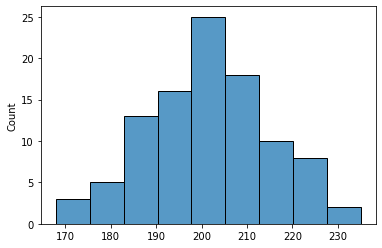

In [13]:
matrix = np.random.binomial(1,0.2,(100,1000))
count = np.sum(matrix,axis=1)
sns.histplot(count)


(b) Collect 1000 samples from the Poisson distribution with λ = N p (Use N = 100 and p = 0.2).
Plot the histogram of these samples.



<AxesSubplot:ylabel='Count'>

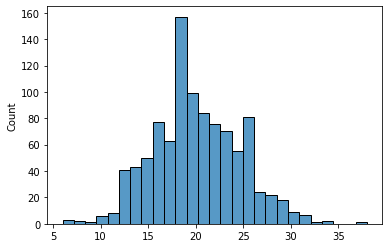

In [53]:
mat_poisson =poisson.rvs(mu=0.2*100, size=1000)
sns.histplot(mat_poisson)


(c) Compare the histograms obtained in Q2(a) and Q2(b). Report your inference.


1. We can see from both the graph, that both possion and binomial dostribution tends to normality following the Central Limit Theorem(CLT).

2. A Poisson random variable will relatively describe a phenomenon if there are few successes over many trials. The Poisson distribution is used as a limiting case of the binomial distribution when the trials are large indefinitely i.e. one can get the Poisson from Binomial by taking limit, and the Binomial from Poisson by conditioning.. If a Poisson distribution models the same binomial phenomenon, λ is replaced by np. Hence, we could clearly say that, for the same random variable. poisson realtively describes with better insights as in compared to binomial distriburtion.


(d) Count the number of failures occurred before two successes in each of the realization and plot
the histogram of the same. For example if a realisation has samples as [0, 0, 1, 0, 1, 0, 0, 0, 1]
the number of failures before 2 successes is 3.

(e) Collect 1000 samples from the negative binomial distribution (n = 2, p = 0.2) and plot the
histogram of the samples. Compare the plot with the plot in Q2(d). Report your inference.

<AxesSubplot:ylabel='Count'>

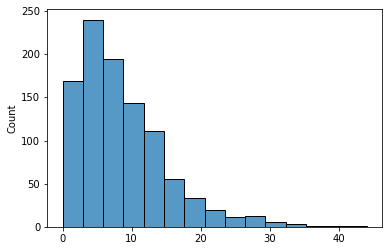

In [55]:
neg = np.random.negative_binomial(2, 0.2, 1000)
sns.histplot(neg,bins=15)

# Question 3 

(a) Histograms of 1st and 2nd digits of daily confirmed COVID-19 cases for all the states during
the second wave.


In [57]:
df = pd.read_csv('states.csv')
df = df[['Date','State','Confirmed','Deceased']]
df['Date']= pd.to_datetime(df['Date'])

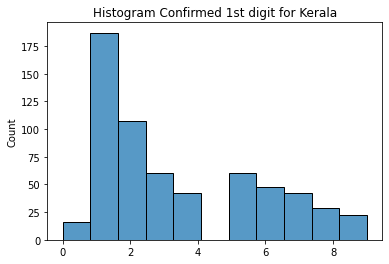

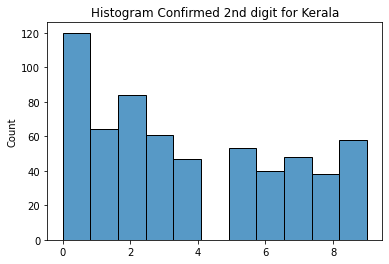

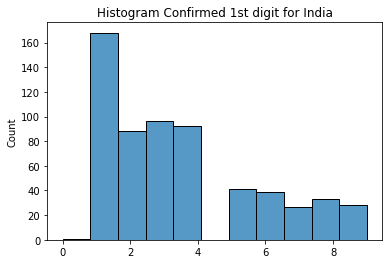

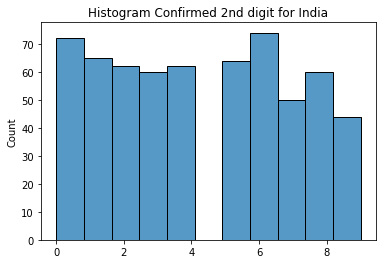

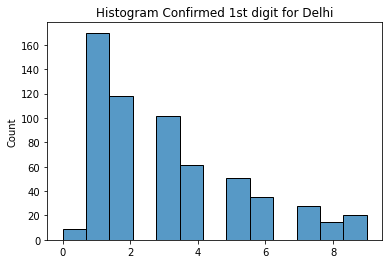

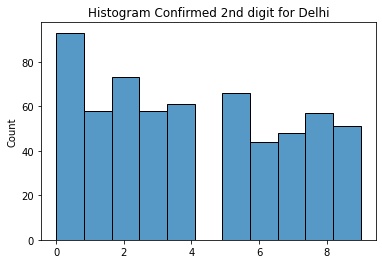

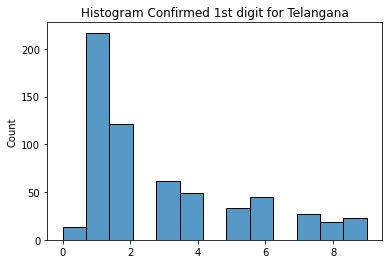

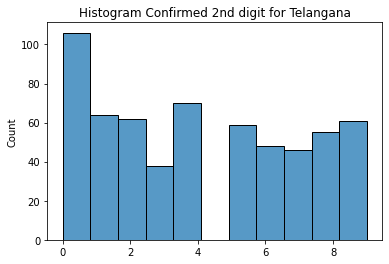

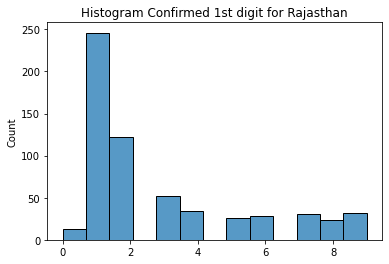

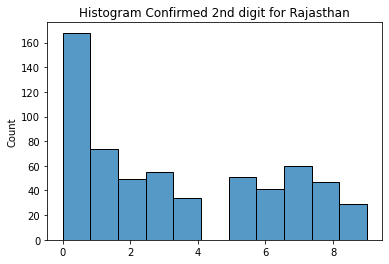

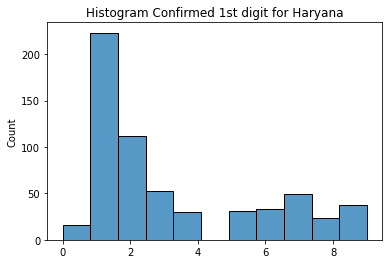

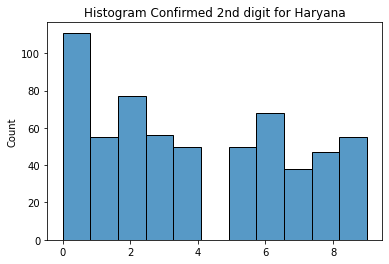

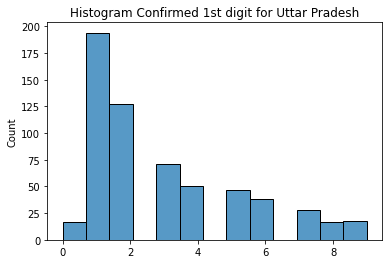

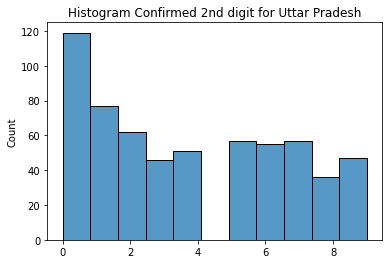

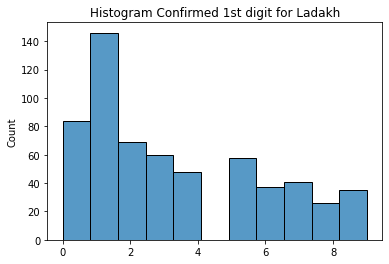

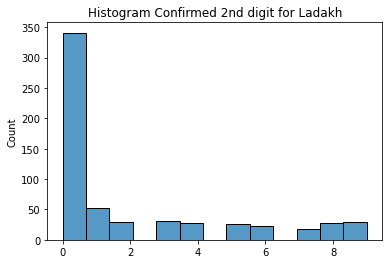

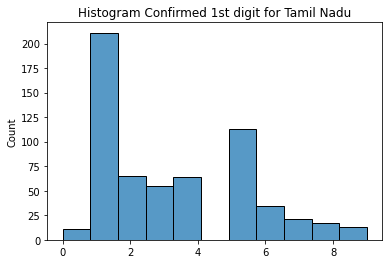

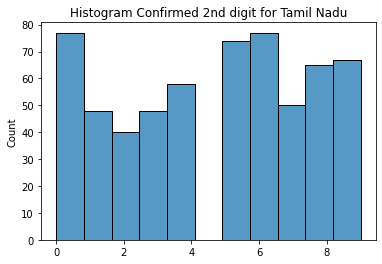

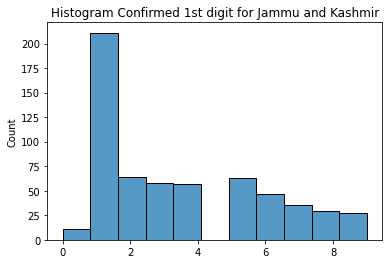

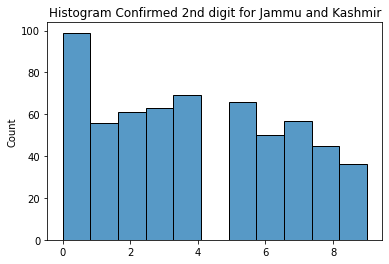

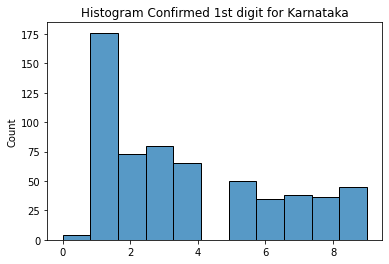

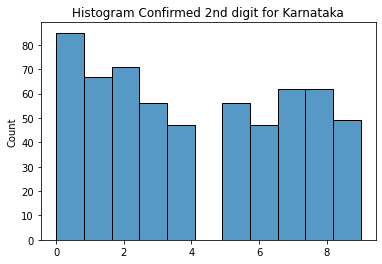

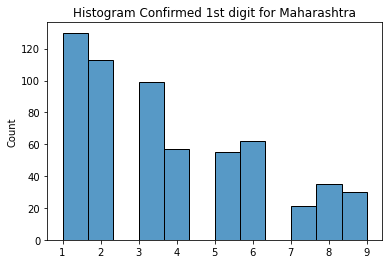

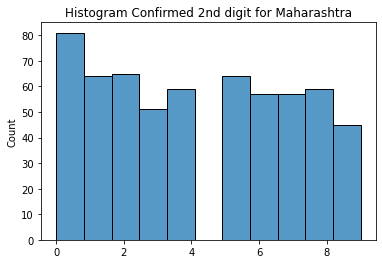

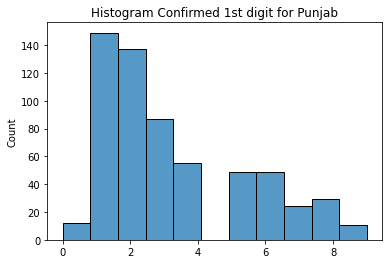

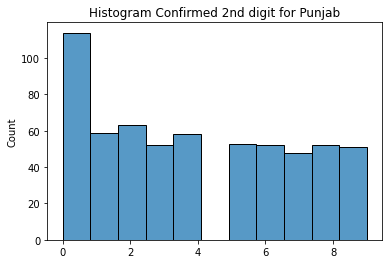

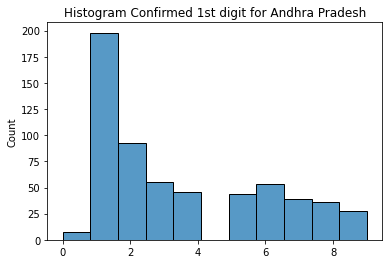

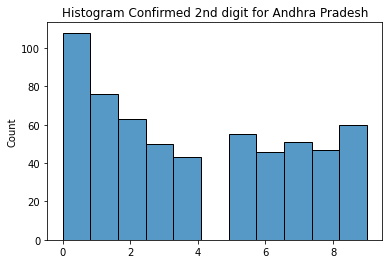

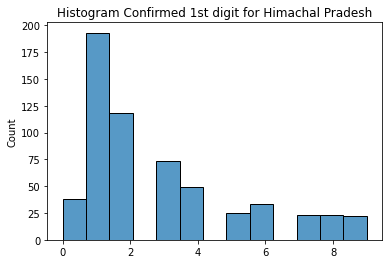

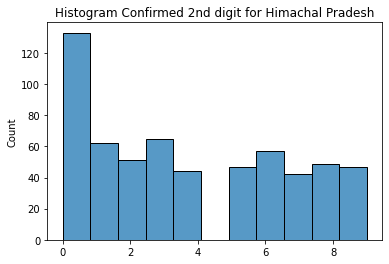

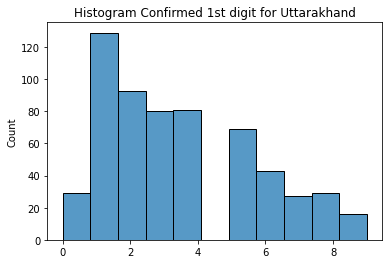

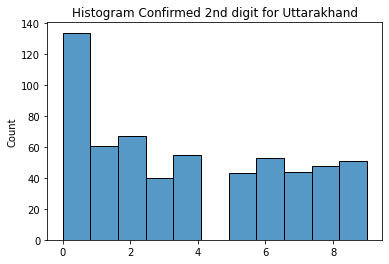

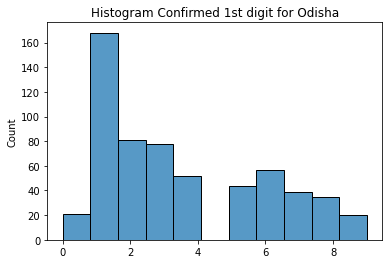

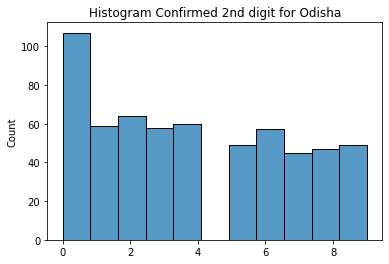

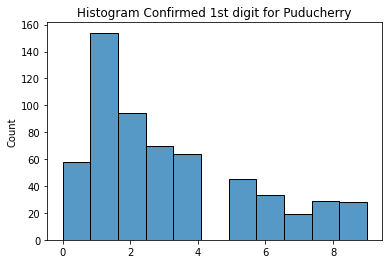

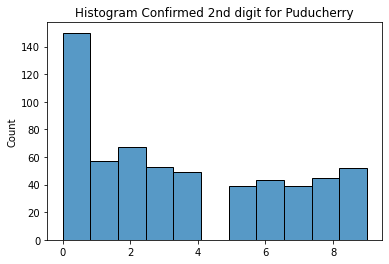

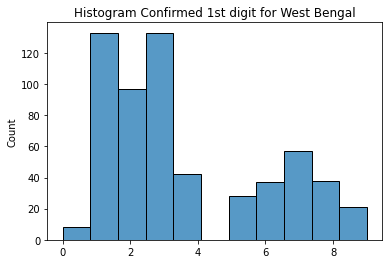

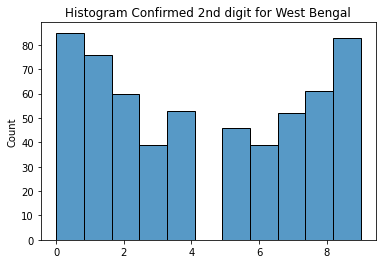

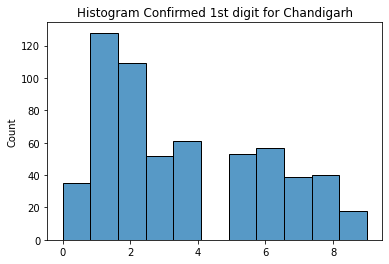

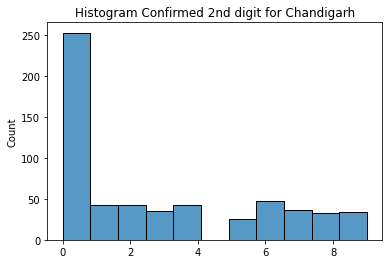

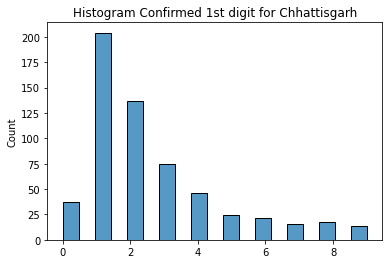

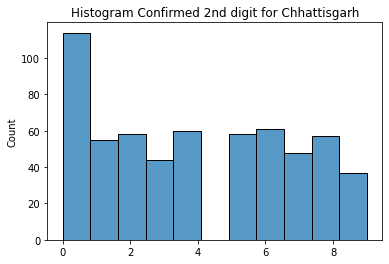

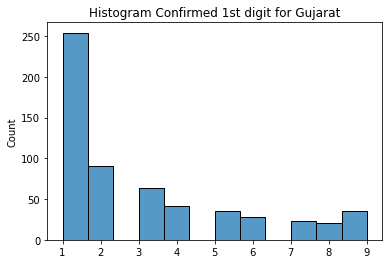

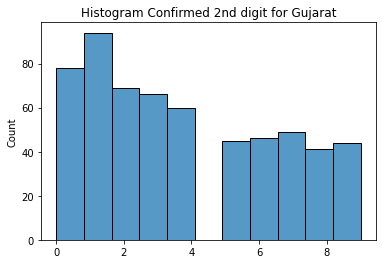

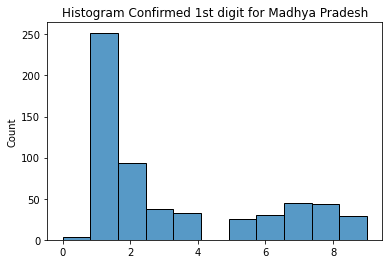

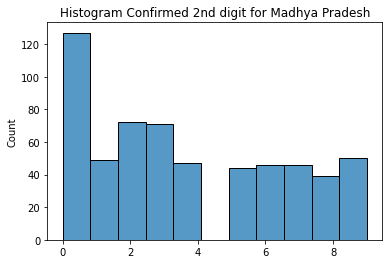

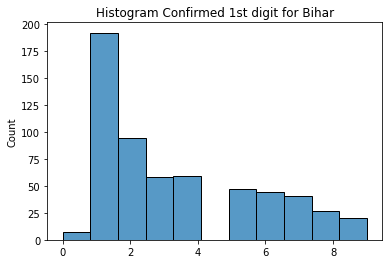

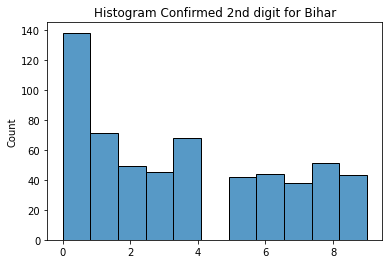

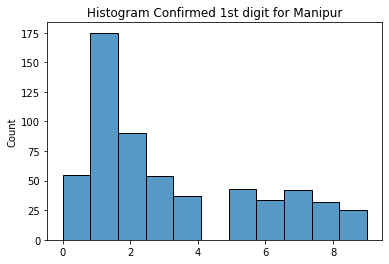

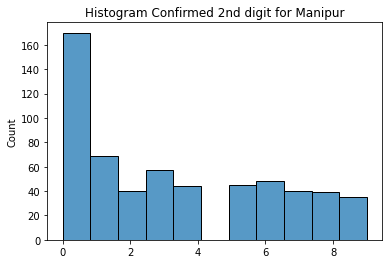

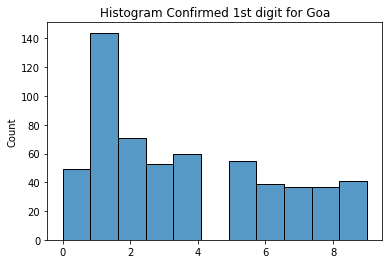

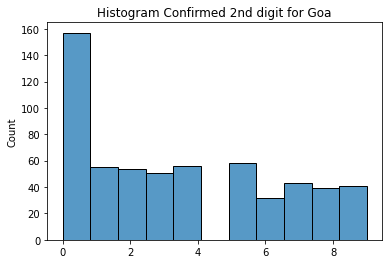

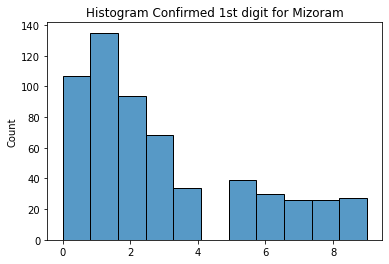

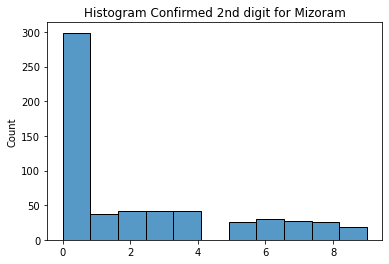

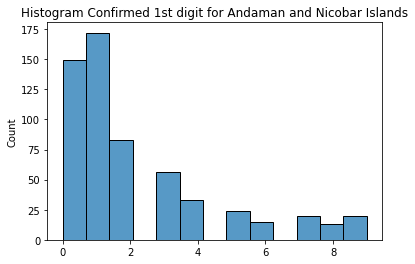

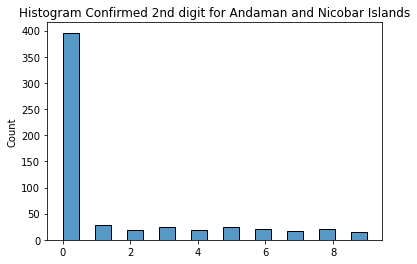

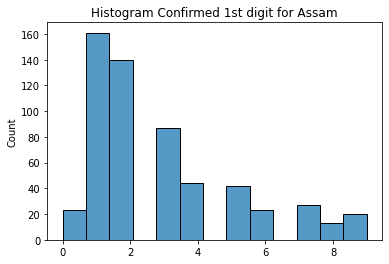

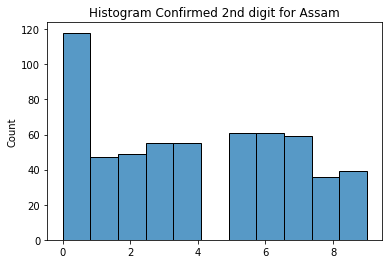

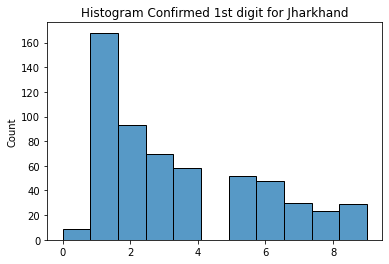

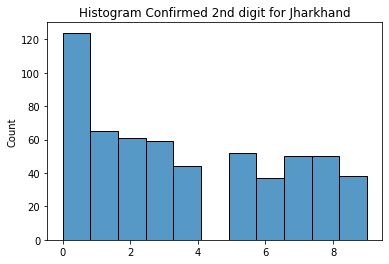

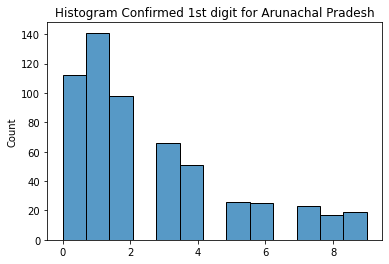

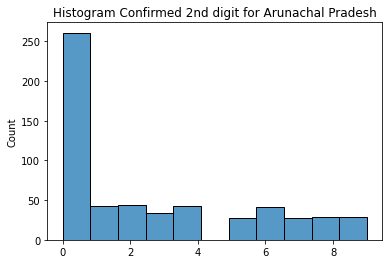

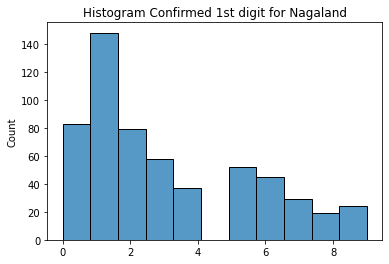

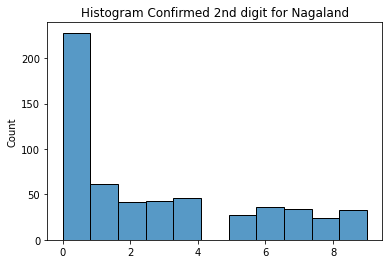

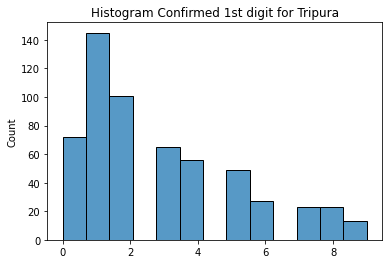

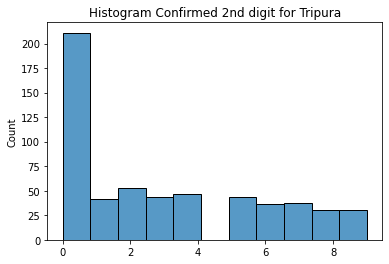

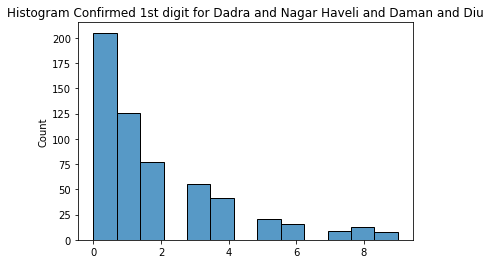

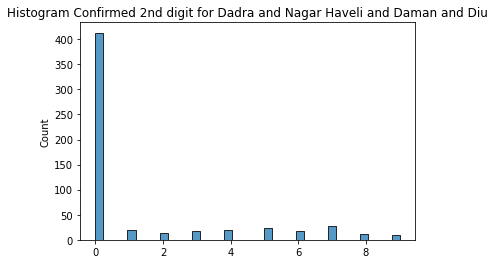

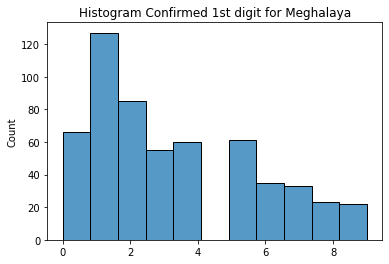

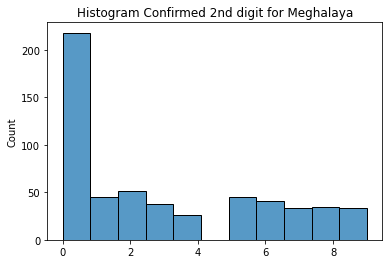

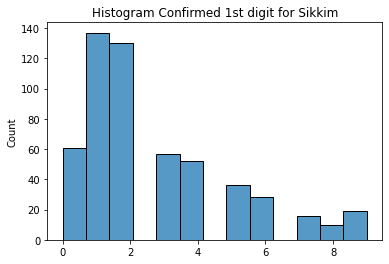

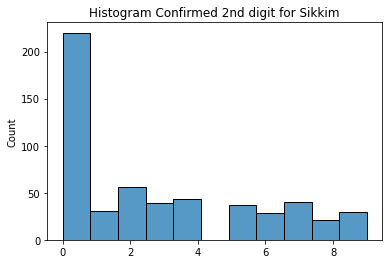

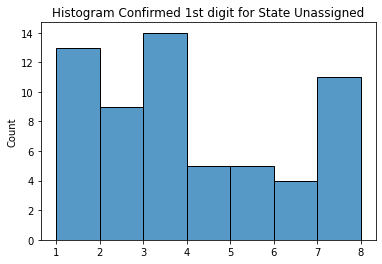

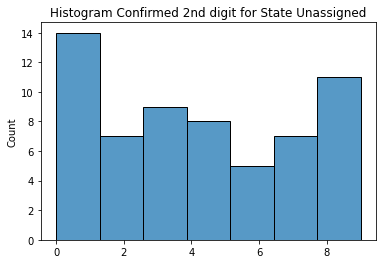

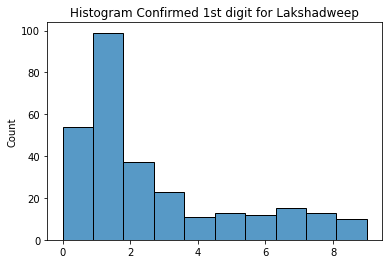

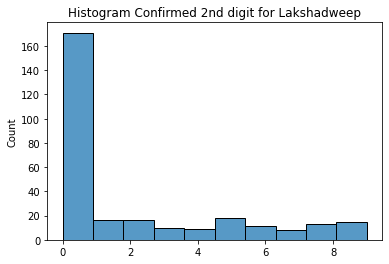

In [58]:
for item in df['State'].unique():
  state_f = np.absolute(df[df['State']==item]['Confirmed'].diff().fillna(df['Confirmed']).astype(int)).astype(str).str[0]  
  state_s = np.absolute(df[df['State']==item]['Confirmed'].diff().fillna(df['Confirmed']).astype(int)).astype(str).str[1].fillna(0)  
  sns.histplot(state_f.values.astype(int))
  plt.title(f'Histogram Confirmed 1st digit for {item}')
  plt.show()
  sns.histplot(state_s.values.astype(int))
  plt.title(f'Histogram Confirmed 2nd digit for {item}')
  plt.show()

#### We can see that , Many of the states except some, confirmed cases first digit follow the law where as a few exceptions like    West Bengal, Kerala and Delhi confirmed case second digit plot doesn't follow the law.|


(b) Histograms of 1st and 2nd digits of daily deceased cases for all the states during the second
wave.

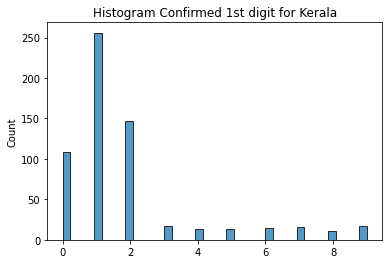

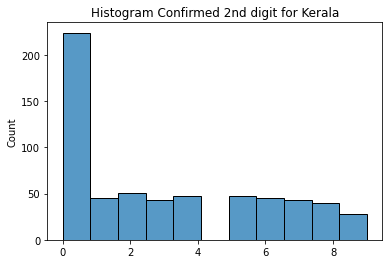

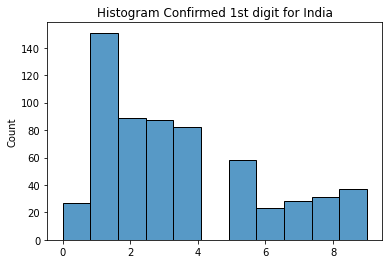

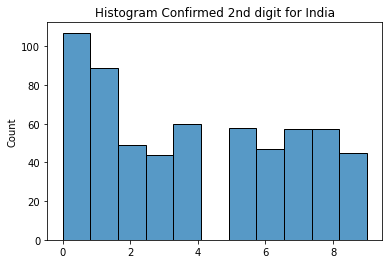

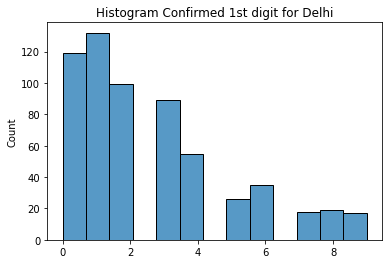

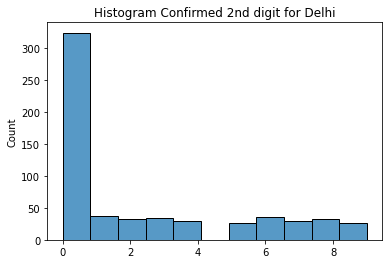

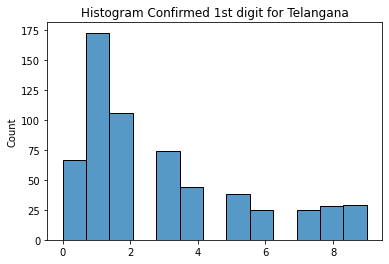

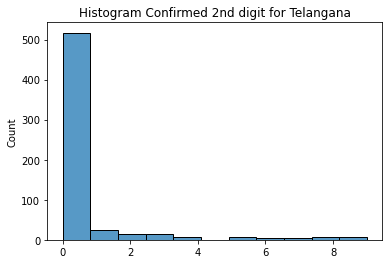

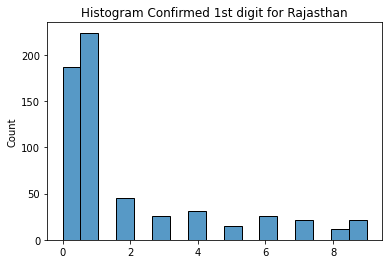

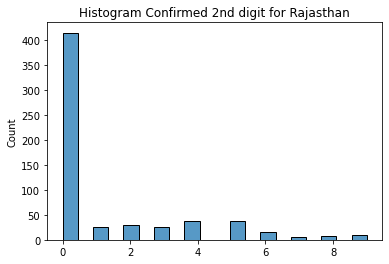

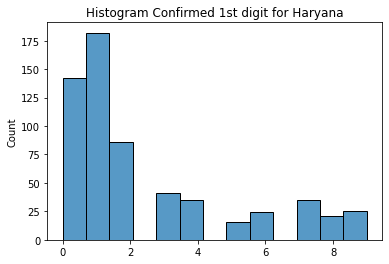

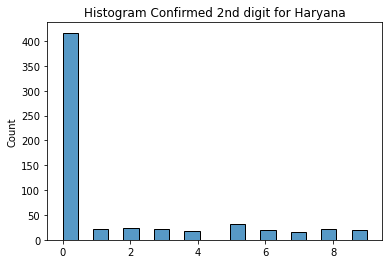

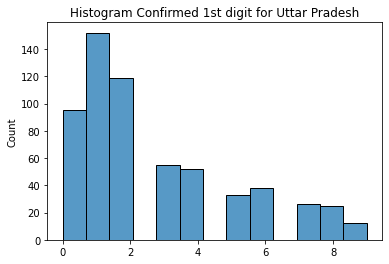

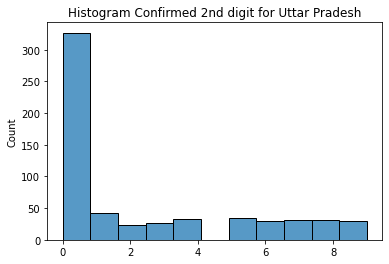

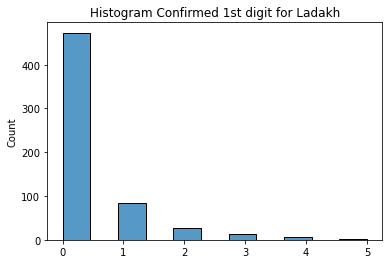

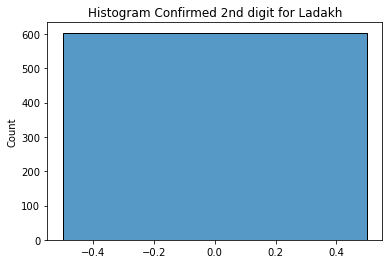

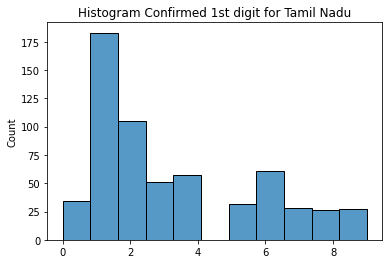

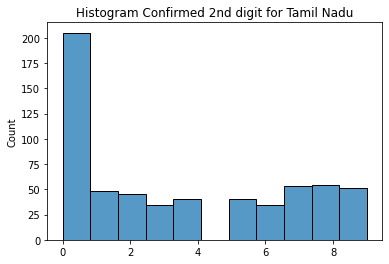

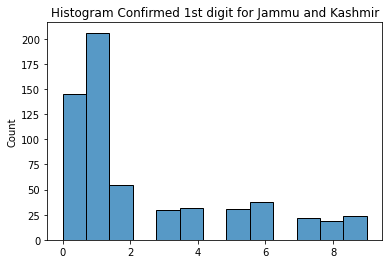

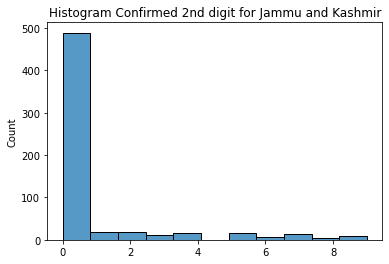

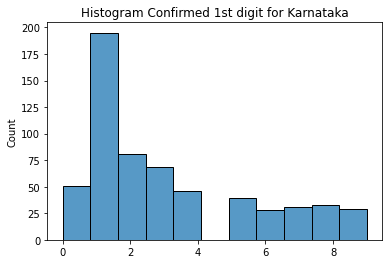

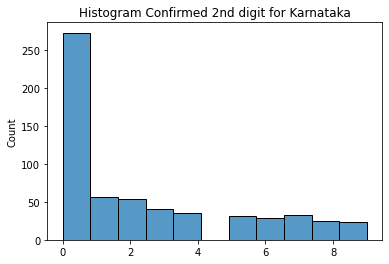

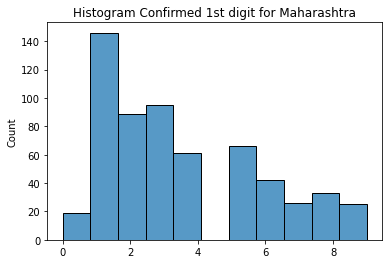

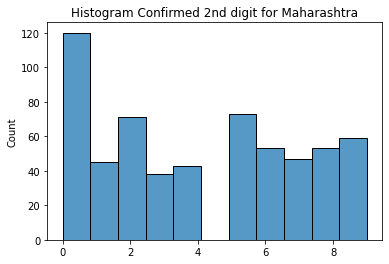

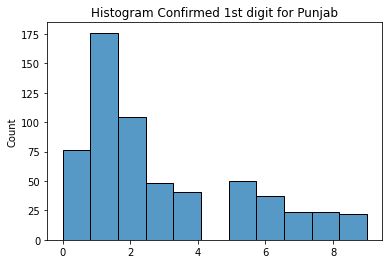

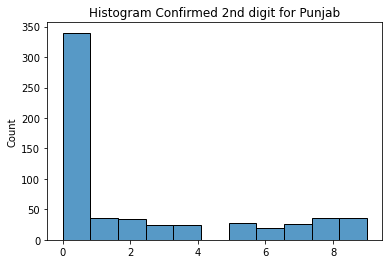

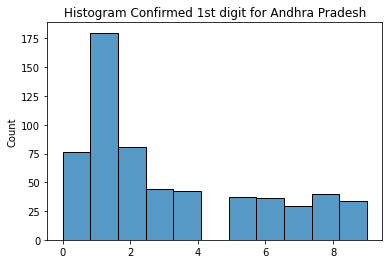

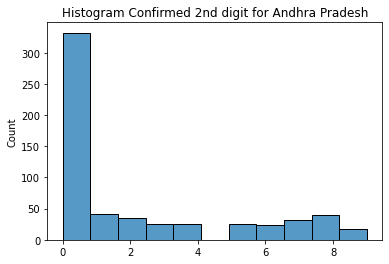

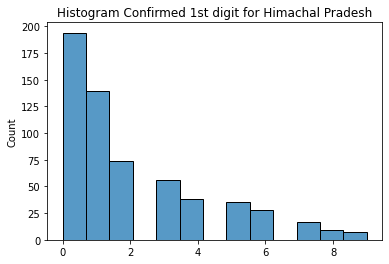

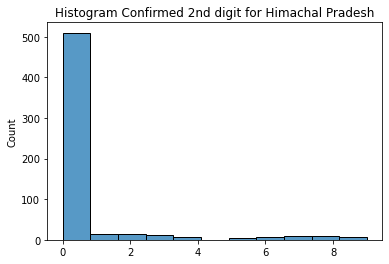

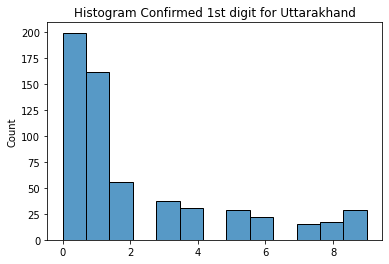

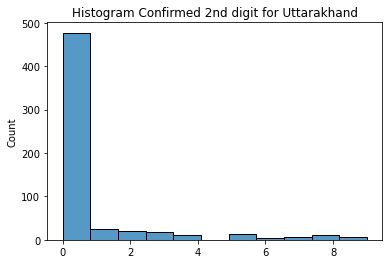

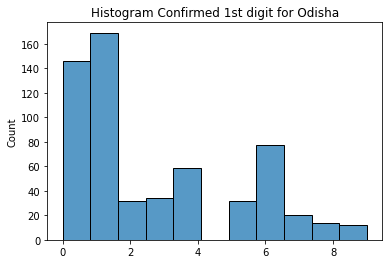

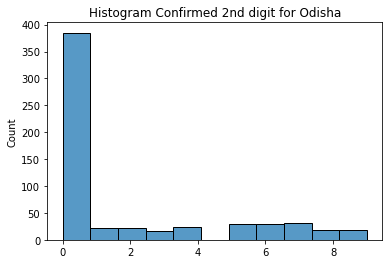

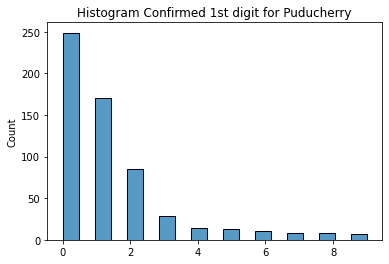

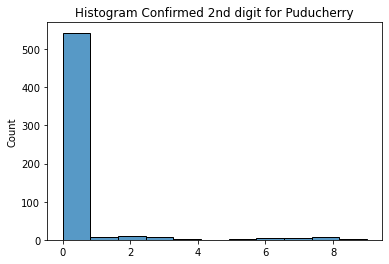

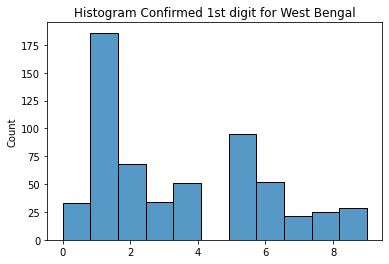

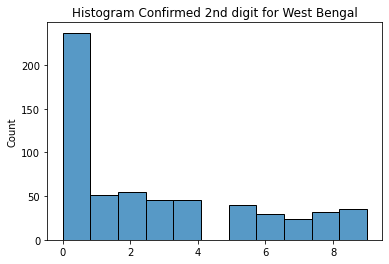

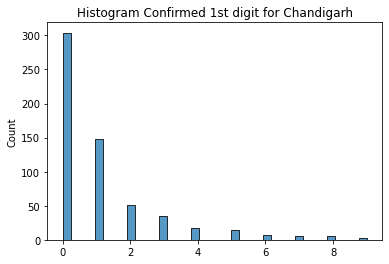

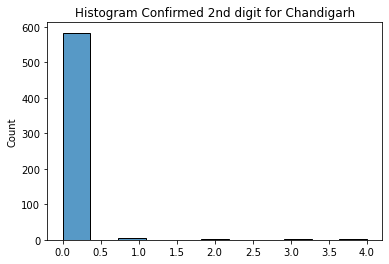

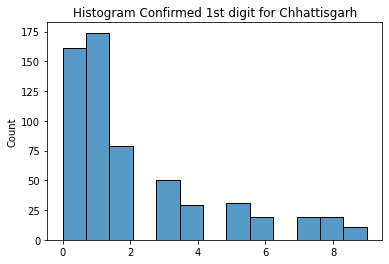

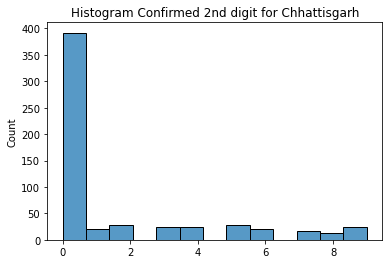

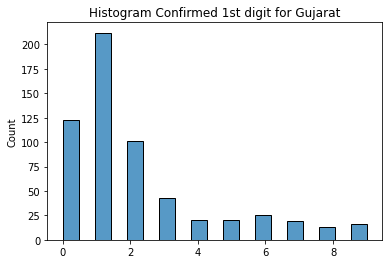

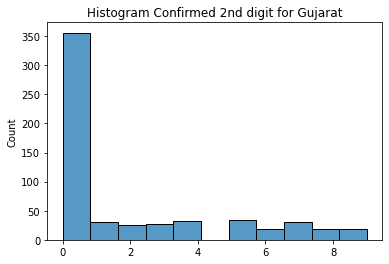

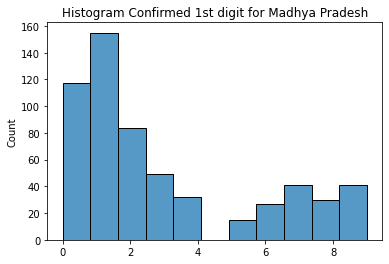

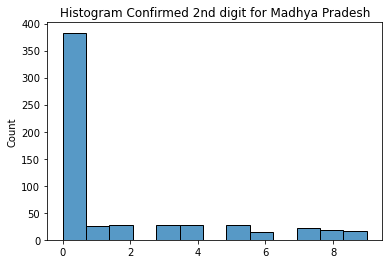

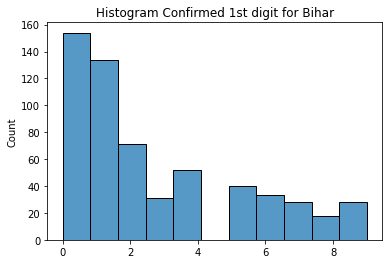

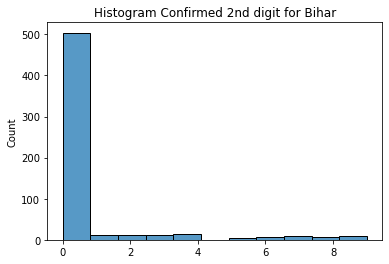

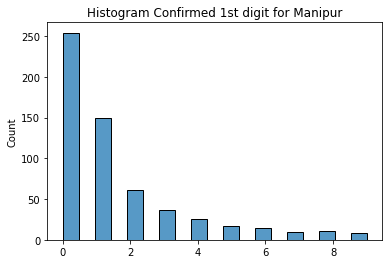

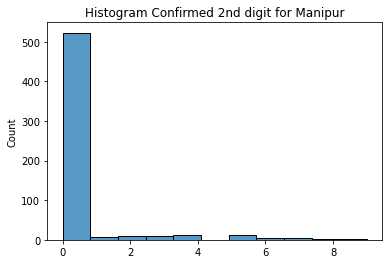

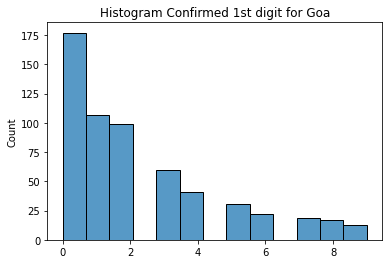

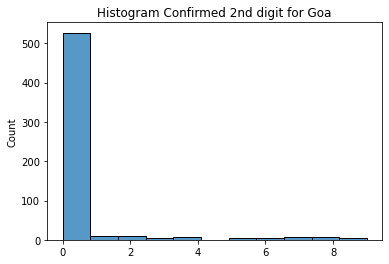

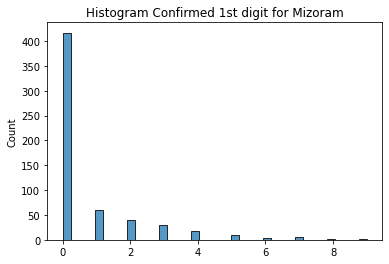

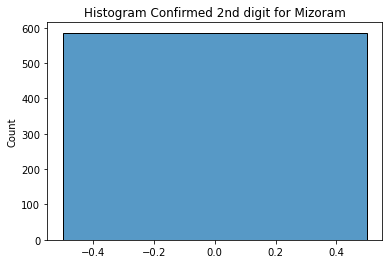

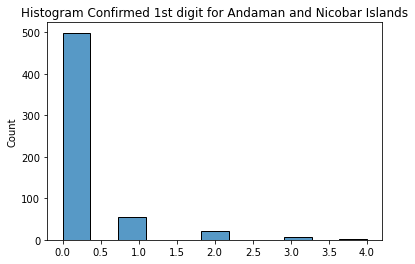

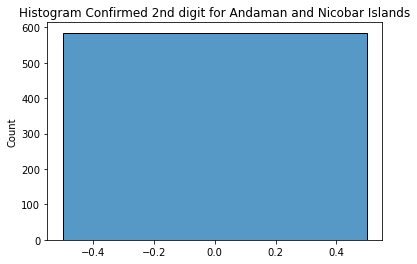

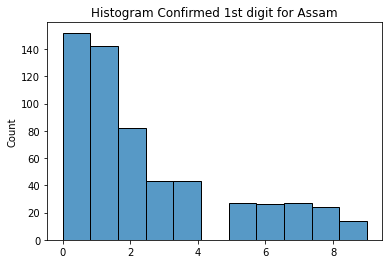

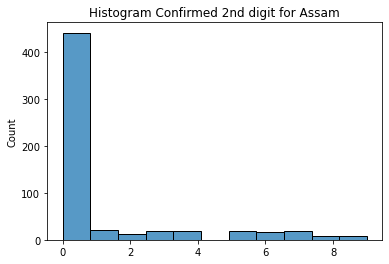

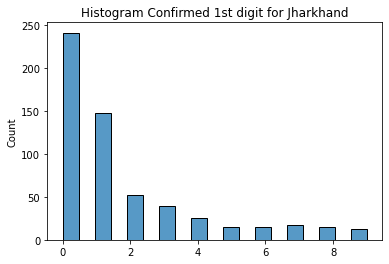

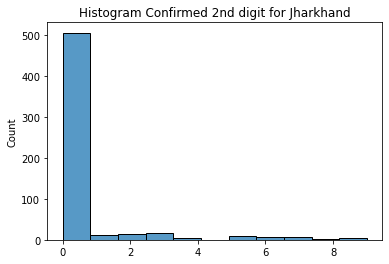

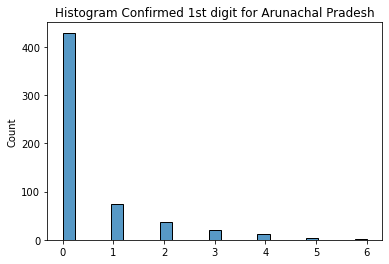

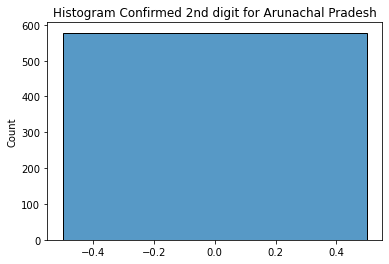

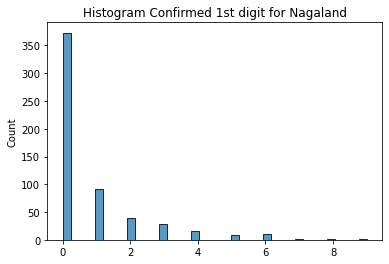

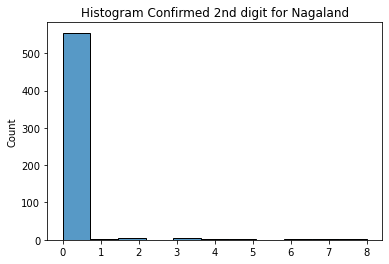

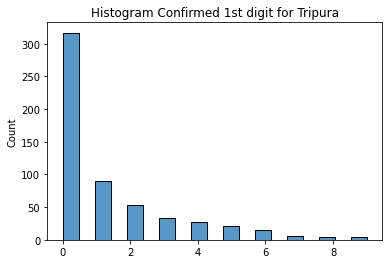

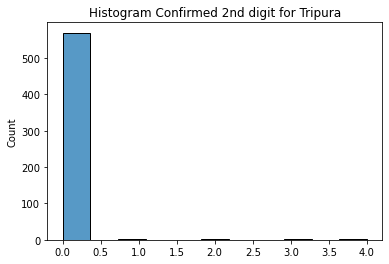

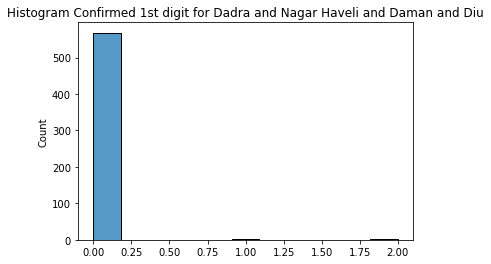

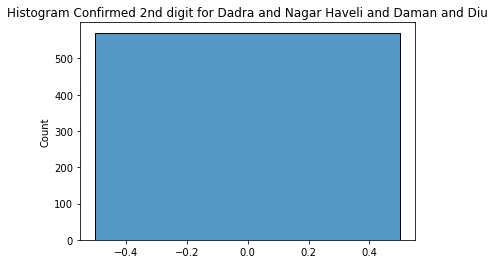

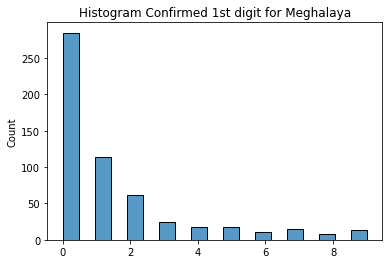

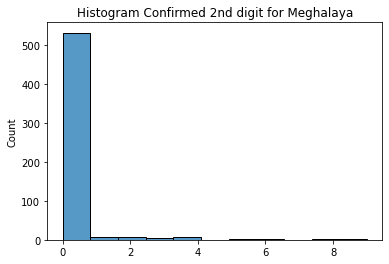

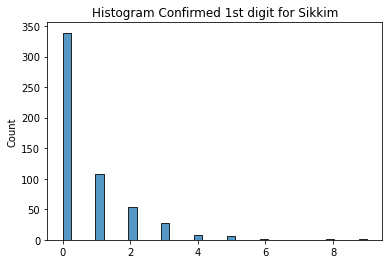

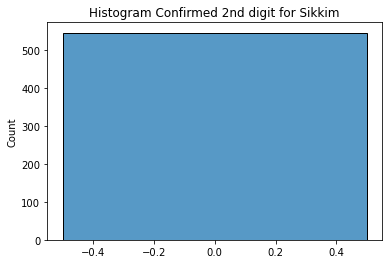

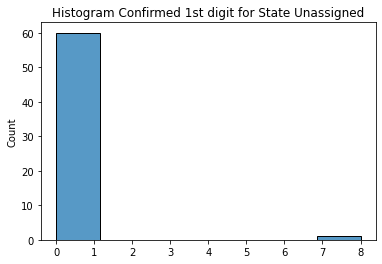

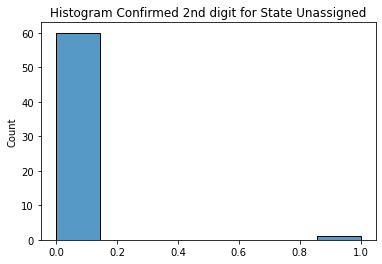

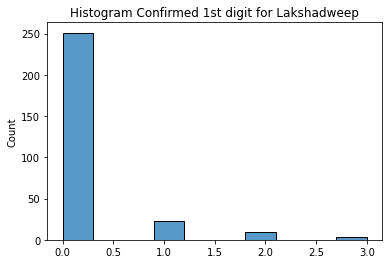

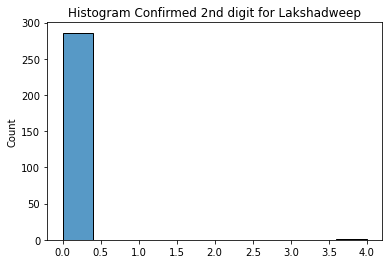

In [59]:
for item in df['State'].unique():
  state_f = np.absolute(df[df['State']==item]['Deceased'].diff().fillna(df['Confirmed']).astype(int)).astype(str).str[0]  
  state_s = np.absolute(df[df['State']==item]['Deceased'].diff().fillna(df['Confirmed']).astype(int)).astype(str).str[1].fillna(0)  
  sns.histplot(state_f.values.astype(int))
  plt.title(f'Histogram Confirmed 1st digit for {item}')
  plt.show()
  sns.histplot(state_s.values.astype(int))
  plt.title(f'Histogram Confirmed 2nd digit for {item}')
  plt.show()

4 Generate samples from the random variables X1, X2, X3, X4, and X5. Such that X1 ∼ N (4, 9)
and X2 ∼ N (5, 7). Also, X3 = 3X1 − 2X2; X4 = X1 + 2X3; X5 = 5X1 − X2.
(a) Estimate the covariance matrix from the obtained samples.
(b) Calculate the rank of the covariance matrix. What does it tell us about the number of independent variables in the given dataset?


In [60]:
X1 = np.random.normal(4,np.sqrt(9),100)
X2 = np.random.normal(5,np.sqrt(7),100)
X3 = 3*X1 - 2*X2
X4 = X1 + 2*X3
X5 = 5*X1 - X2

In [61]:
X3bar = np.mean(X3)
X3std = np.var(X3)
X4bar = np.mean(X4)
X4std = np.var(X4)
X5bar = np.mean(X5)
X5std = np.var(X5)
print(X3bar, X3std, X4bar, X4bar)

0.08419961556635616 114.97121317617184 3.5466806748245 3.5466806748245


In [64]:
X = np.array([X1, X2, X3, X4, X5])

covm = np.cov(X, bias=True)
print(covMatrix)

[[ 9.91176358e+00  1.52324999e-01  2.94306407e+01  6.87730451e+01
   4.94064929e+01]
 [ 1.52324999e-01  6.89831024e+00 -1.33396455e+01 -2.65269660e+01
  -6.13668524e+00]
 [ 2.94306407e+01 -1.33396455e+01  1.14971213e+02  2.59373067e+02
   1.60492849e+02]
 [ 6.87730451e+01 -2.65269660e+01  2.59373067e+02  5.87519179e+02
   3.70392191e+02]
 [ 4.94064929e+01 -6.13668524e+00  1.60492849e+02  3.70392191e+02
   2.53169150e+02]]


In [65]:
print("The rank of the cov matrix is: ", np.linalg.matrix_rank(covm))

The rank of the cov matrix is:  2


Here since, the rank of the matrix is 2. There are 2 independent variables and 3 dependent variables.

In [66]:
X6 = np.square(X1) + np.square(X2)*X2
X7 = np.square(X1)/X2

In [68]:
new = [X1, X2, X3, X4, X5, X6, X7]
newcovm = np.cov(new)
newcovm

array([[ 1.00118824e+01,  1.53863635e-01,  2.97279199e+01,
         6.94677223e+01,  4.99055484e+01,  5.50818795e+01,
         1.21601627e+01],
       [ 1.53863635e-01,  6.96799014e+00, -1.34743894e+01,
        -2.67949151e+01, -6.19867196e+00,  6.26372006e+02,
        -3.31811761e-01],
       [ 2.97279199e+01, -1.34743894e+01,  1.16132539e+02,
         2.61992997e+02,  1.62113989e+02, -1.08749837e+03,
         3.71441116e+01],
       [ 6.94677223e+01, -2.67949151e+01,  2.61992997e+02,
         5.93453716e+02,  3.74133527e+02, -2.11991487e+03,
         8.64483859e+01],
       [ 4.99055484e+01, -6.19867196e+00,  1.62113989e+02,
         3.74133527e+02,  2.55726414e+02, -3.50962608e+02,
         6.11326252e+01],
       [ 5.50818795e+01,  6.26372006e+02, -1.08749837e+03,
        -2.11991487e+03, -3.50962608e+02,  7.23836233e+04,
        -1.40613670e+02],
       [ 1.21601627e+01, -3.31811761e-01,  3.71441116e+01,
         8.64483859e+01,  6.11326252e+01, -1.40613670e+02,
         2.5563978

In [69]:
print("The rank of the covariance matrix is: ", np.linalg.matrix_rank(newcovm))

The rank of the covariance matrix is:  4


In [ ]:
Yes the rank of the covariance matrix has increased.